<h1>For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.</h1><h2>
1. Start by fitting a linear regression model with target being life expectancy and predictor variable rer</h2> 
   <h3> a. What coefficients do you get? Interpret the meaning of these coefficents</h3> 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from patsy.builtins import *
import statsmodels.stats.api as sms
import math

In [3]:
gdp_le = pd.read_csv('../un-linear-regression-GetGubbz/data/gdp_le.csv')

In [4]:
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


In [5]:
gdp_le.shape

(5504, 5)

In [6]:
le_vs_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [7]:
le_vs_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

<hr>
<h3>b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. </h3>
    
    Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [9]:
le_vs_year_no_1990 = smf.ols("Life_Expectancy ~ I(Year > 1990)", data=gdp_le).fit()

In [10]:
le_vs_year_no_1990.params

Intercept                 64.745253
I(Year > 1990)[T.True]     4.381894
dtype: float64

The new coefficient suggests a higher rate of life expectancy after the year 1990

In [12]:
le_vs_year_no_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.12
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.54e-08
Time:                        14:38:32   Log-Likelihood:                -20139.
No. Observations:                5504   AIC:                         4.028e+04
Df Residuals:                    5502   BIC:                         4.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 64.7453      0.775     83.556      0.000      63.226      66.264
I(Year > 1990)[T.True]     4.3819      0.785      5.579      0.000       2.842       5.922
==============================================================================
Omnibus:                      441.762   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.020
Skew:                          -0.776   Prob(JB):                    3.01e-121
Kurtosis:                       3.119   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for this model is 0, which is less than a normal significance value 0.05, so the coefficients are statistically significant

<hr>
<h3>c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [15]:
av_le_per_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index().copy()
av_le_per_year

,Year,Life_Expectancy
0,1990,64.745253
1,1991,65.021276
2,1992,65.217845
3,1993,65.218031
4,1994,65.339539
5,1995,65.956224
6,1996,66.200189
7,1997,66.437280
8,1998,66.556082
9,1999,66.916176


In [16]:
pred_av_le_per_year = gdp_le[['Year']].copy()
pred_av_le_per_year['mean_estimate'] = le_vs_year.predict(pred_av_le_per_year)
pred_av_le_per_year

,Year,mean_estimate
0,2021,72.928275
1,2020,72.660553
2,2019,72.392831
3,2018,72.125109
4,2017,71.857387
...,...,...
5499,1994,65.699778
5500,1993,65.432056
5501,1992,65.164334
5502,1991,64.896612


The model fits fairly close to what is expected per year

<hr>
<h3>d. Plot the actual values against your model's estimates for the mean life expectancy.  

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

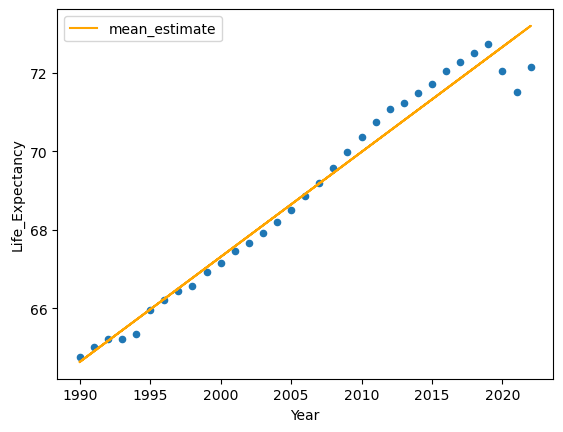

In [19]:
fig, ax = plt.subplots()
av_le_per_year.plot(kind = 'scatter', x='Year', y = 'Life_Expectancy', ax=ax)
pred_av_le_per_year.plot(kind = 'line', x="Year", y='mean_estimate',color='orange', ax=ax)

<hr>
 <h3>e. Inspect the R-squared value for the model. does it make sense, given the plot?  

In [21]:
le_vs_year.rsquared

0.07154748843194658

<hr>
<h2> 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  </h2>
    <h3>a. What coefficients do you get? Interpret the meaning of those coefficients.</h3>


In [23]:
gdp_le_2021 = (gdp_le[gdp_le['Year'] == 2021]).copy()
gdp_le_2021.shape

(173, 5)

In [24]:
le_vs_gdp = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

In [25]:
le_vs_gdp.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

Life expectancy increases by 0.00025 per increase in GDP per capita

<hr>
<h3>b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [28]:
le_vs_gdp1000 = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita/1000)", data=gdp_le).fit()

In [29]:
le_vs_gdp1000.params

Intercept                   63.576656
I(GDP_Per_Capita / 1000)     0.302024
dtype: float64

The slope is steeper but likely more legible than before. Intercept does not change since GDP_Per_Capita remains at zero

<hr>
<h3>c. Are the coefficients statistically significant?  

In [32]:
le_vs_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        14:38:33   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
le_vs_gdp1000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4149.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:38:33   Log-Likelihood:                -18608.
No. Observations:                5504   AIC:                         3.722e+04
Df Residuals:                    5502   BIC:                         3.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   63.5767      0.128    497.815      0.000      63.326      63.827
I(GDP_Per_Capita / 1000)     0.3020      0.005     64.411      0.000       0.293       0.311
==============================================================================
Omnibus:                      899.156   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1426.881
Skew:                          -1.132   Prob(JB):                    1.43e-310
Kurtosis:                       4.046   Cond. No.                         36.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values remain zero for both versions, leading to throwing out the null hypothesis so the coefficients are statistically significant

<hr>
<h3>d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000? </h3>

In [36]:
GDP_Per_Capita_50000 = 50
estimate_50000 = le_vs_gdp.params['Intercept'] + le_vs_gdp.params['GDP_Per_Capita']*GDP_Per_Capita_50000
estimate_50000

65.9627144247873

In [37]:
GDP_Per_Capita_100000 = 100
estimate_100000 = le_vs_gdp.params['Intercept'] + le_vs_gdp.params['GDP_Per_Capita']*GDP_Per_Capita_100000
estimate_100000

65.97555901219633

<hr>
<h3>e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?</h3>

In [39]:
av_le_per_GDP = gdp_le_2021.groupby('GDP_Per_Capita')['Life_Expectancy'].mean().reset_index()
av_le_per_GDP

,GDP_Per_Capita,Life_Expectancy
0,714.066712,61.663000
1,837.504686,53.895000
2,1136.735989,55.280000
3,1186.576809,61.576000
4,1226.766964,59.325000
...,...,...
168,78570.489515,79.280000
169,92862.571798,79.272000
170,102785.490239,82.353659
171,107741.118436,83.092683


In [125]:
pred_le_vs_gdp = pd.DataFrame({'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())})
pred_le_vs_gdp['mean_estimate'] = le_vs_gdp.predict(pred_le_vs_gdp)
pred_le_vs_gdp

,GDP_Per_Capita,mean_estimate
0,714.066712,66.133308
1,3060.381549,66.736057
2,5406.696386,67.338806
3,7753.011222,67.941554
4,10099.326059,68.544303
5,12445.640896,69.147052
6,14791.955732,69.749801
7,17138.270569,70.352550
8,19484.585406,70.955299
9,21830.900242,71.558048


<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

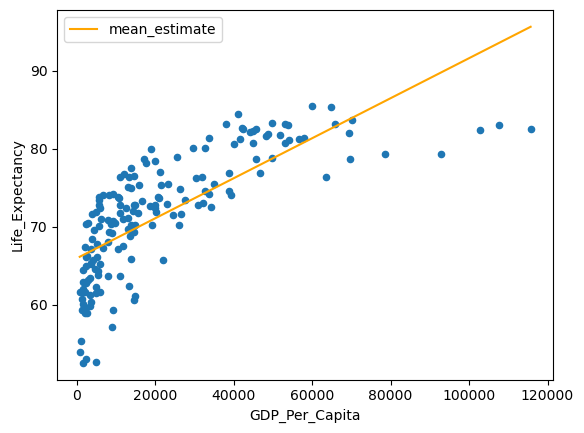

In [127]:
fig, ax = plt.subplots()
av_le_per_GDP.plot(kind = 'scatter', x='GDP_Per_Capita', y = 'Life_Expectancy', ax=ax)
pred_le_vs_gdp.plot(kind = 'line', x="GDP_Per_Capita", y='mean_estimate',color='orange', ax=ax)

The model could benefit from a different type of regression rather than linear. Linear regression does not seem to fit, but it may fit the log of GDP

<hr>
<h2>3. Now, fit a model for life expectancy based on the log of gdp per capita.</h2>
   <h3> a. Inspect the coefficients for this model. Are they statistically signifcantn </h3>


In [45]:
gdp_le_2021['Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5377,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5439,Zambia,2021,3236.788981,Africa,61.223,8.082337


In [46]:
le_vs_log_gdp = smf.ols("Life_Expectancy ~ Log_GDP_Per_Capita", data=gdp_le_2021).fit()

In [47]:
le_vs_log_gdp.params

Intercept             18.946970
Log_GDP_Per_Capita     5.589014
dtype: float64

In [48]:
le_vs_log_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        14:38:33   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.9470      2.547      7.438      0.000      13.919      23.975
Log_GDP_Per_Capita     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values remain < 0.005, so the coefficients are statistically significant

<hr>
<h3> b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of

</h3> $50,000? <h3>What about for those with a gdp per capita of </h3> $100,000?

In [51]:
log_GDP_Per_Capita_50000 = 50
log_estimate_50000 = le_vs_log_gdp.params['Intercept'] + le_vs_log_gdp.params['Log_GDP_Per_Capita']*log_GDP_Per_Capita_50000
log_estimate_50000

298.3976624641847

In [52]:
log_GDP_Per_Capita_100000 = 100
log_estimate_100000 = le_vs_log_gdp.params['Intercept'] + le_vs_log_gdp.params['Log_GDP_Per_Capita']*log_GDP_Per_Capita_100000
log_estimate_100000

577.8483548667092

<hr>
<h3>c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

In [54]:
log_av_le_per_GDP = gdp_le_2021.groupby('Log_GDP_Per_Capita')['Life_Expectancy'].mean().reset_index()
log_av_le_per_GDP

,Log_GDP_Per_Capita,Life_Expectancy
0,6.570976,61.663000
1,6.730427,53.895000
2,7.035916,55.280000
3,7.078828,61.576000
4,7.112138,59.325000
...,...,...
168,11.271751,79.280000
169,11.438876,79.272000
170,11.540399,82.353659
171,11.587487,83.092683


In [111]:
log_pred_le_vs_gdp = pd.DataFrame({'Log_GDP_Per_Capita': np.linspace(start=gdp_le_2021['Log_GDP_Per_Capita'].min(), stop=gdp_le_2021['Log_GDP_Per_Capita'].max())})
log_pred_le_vs_gdp['mean_estimate'] = le_vs_log_gdp.predict(log_pred_le_vs_gdp)
log_pred_le_vs_gdp

,Log_GDP_Per_Capita,mean_estimate
0,6.570976,55.672248
1,6.674806,56.252552
2,6.778635,56.832855
3,6.882464,57.413159
4,6.986294,57.993462
5,7.090123,58.573766
6,7.193952,59.154069
7,7.297782,59.734373
8,7.401611,60.314676
9,7.505440,60.894980


<Axes: xlabel='Log_GDP_Per_Capita', ylabel='Life_Expectancy'>

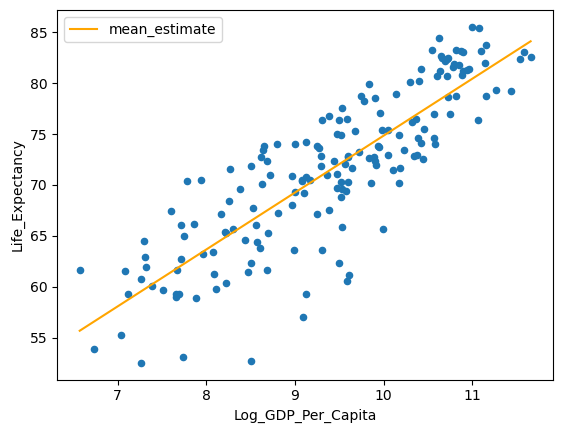

In [113]:
fig, ax = plt.subplots()
log_av_le_per_GDP.plot(kind = 'scatter', x='Log_GDP_Per_Capita', y = 'Life_Expectancy', ax=ax)
log_pred_le_vs_gdp.plot(kind = 'line', x="Log_GDP_Per_Capita", y='mean_estimate',color='orange', ax=ax)

<hr>
<h2>4. Finally, return to the full dataset. </h2>
    <h3>a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.</h3>


In [95]:
gdp_le['Log_GDP_Per_Capita'] = np.log(gdp_le['GDP_Per_Capita'])
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
1,Afghanistan,2020,1968.341002,Asia,62.575,7.584946
2,Afghanistan,2019,2079.921861,Asia,63.565,7.640086
3,Afghanistan,2018,2060.698973,Asia,63.081,7.630801
4,Afghanistan,2017,2096.093111,Asia,63.016,7.647830
...,...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588,7.889874
5500,Zimbabwe,1993,2458.783255,Africa,54.426,7.807422
5501,Zimbabwe,1992,2468.278257,Africa,56.435,7.811276
5502,Zimbabwe,1991,2781.787843,Africa,58.091,7.930849


In [101]:
full_gdp_le_logfit = smf.ols("Life_Expectancy ~ Log_GDP_Per_Capita", data=gdp_le).fit()
full_gdp_le_logfit.params

Intercept             9.194102
Log_GDP_Per_Capita    6.531130
dtype: float64

<hr>
<h3>b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?</h3>

In [107]:
full_gdp_le_logfit_year = smf.ols("Life_Expectancy ~ Log_GDP_Per_Capita + Year", data=gdp_le).fit()
full_gdp_le_logfit_year.params

Intercept            -259.067406
Log_GDP_Per_Capita      6.359936
Year                    0.134487
dtype: float64